In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
n_samples = 300
n_features = 2
n_classes = 2

In [3]:
def create_gaussian_data_1(n_samples):
    mean = [1, 1]
    cov = [[1, 0], [0, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)
    labels = np.zeros(n_samples)
    return data, labels

def create_gaussian_data_2(n_samples):
    mean = [6, 6]
    cov = [[1, 0], [0, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)
    labels = np.ones(n_samples)
    return data, labels

In [4]:
data1, labels1 = create_gaussian_data_1(n_samples)
data2, labels2 = create_gaussian_data_2(n_samples)


data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='relu', input_shape=(n_features,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [9]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
loss = model.evaluate(X_test, y_test, verbose=0)[0]

Epoch 1/1000
12/12 [==============================] - 3s 123ms/step - loss: 0.5389 - accuracy: 0.6484 - val_loss: 0.5217 - val_accuracy: 0.6458
Epoch 2/1000
12/12 [==============================] - 0s 19ms/step - loss: 0.5315 - accuracy: 0.6589 - val_loss: 0.5141 - val_accuracy: 0.6458
Epoch 3/1000
12/12 [==============================] - 0s 19ms/step - loss: 0.5243 - accuracy: 0.6615 - val_loss: 0.5068 - val_accuracy: 0.6458
Epoch 4/1000
12/12 [==============================] - 0s 40ms/step - loss: 0.5174 - accuracy: 0.6719 - val_loss: 0.4997 - val_accuracy: 0.6562
Epoch 5/1000
12/12 [==============================] - 1s 51ms/step - loss: 0.5110 - accuracy: 0.6745 - val_loss: 0.4928 - val_accuracy: 0.6667
Epoch 6/1000
12/12 [==============================] - 0s 30ms/step - loss: 0.5044 - accuracy: 0.6771 - val_loss: 0.4863 - val_accuracy: 0.6667
Epoch 7/1000
12/12 [==============================] - 0s 23ms/step - loss: 0.4983 - accuracy: 0.6797 - val_loss: 0.4801 - val_accuracy: 0.666

313/313 [==============================] - 1s 2ms/step


<ipython-input-10-9bb40e1102ca>:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=[0.5], colors='k', linestyles=['dashed'], label='SL')


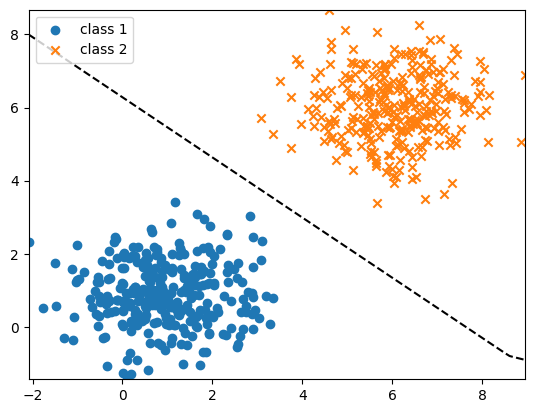

In [10]:
plt.scatter(data1[:, 0], data1[:, 1], label='class 1', marker='o')
plt.scatter(data2[:, 0], data2[:, 1], label='class 2', marker='x')

x_line = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
y_line = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 100)
X, Y = np.meshgrid(x_line, y_line)
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=[0.5], colors='k', linestyles=['dashed'], label='SL')

plt.legend()
plt.show()
